In [1]:
%load_ext autoreload 
%autoreload 2
import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist

import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')
#sys.path.append(r'C:\Users\nlab\Documents\GitHub\obstacle_avoidance\plots') # go to parent dir 

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots.plots import plot_oa
from plots.plots2 import *
#from plots.plots import *
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
c:\Users\nlab\anaconda3\envs\ephys0\lib\site-packages\deeplabcut\__init__.py:78: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


In [2]:
light = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_light.json",'blank')
light.gather_session_df('obstacle',6)

dark = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_dark.json",'blank')
dark.gather_session_df('obstacle',6)
light_df,dark_df = light.df, dark.df

6
6


In [21]:
light_df.condition = 'light'
dark.df.condition = 'dark'

In [19]:
calculate_relative_distance_goal(light_df)

calculate_relative_distance(light_df)

angle_to_open_corner(light_df)

angle_to_target_port(light_df)

zero_out_angle(light_df)

zero_out_angle_target_port(light_df)

df_tortuosity(light_df)

lateral_error_open_corner(light_df)

find_consective_trials(light_df)

calculate_speed(light_df)

calculate_relative_distance_goal(dark_df)

calculate_relative_distance(dark_df)

angle_to_open_corner(dark_df)

angle_to_target_port(dark_df)

zero_out_angle(dark_df)

zero_out_angle_target_port(dark_df)

df_tortuosity(dark_df)

lateral_error_open_corner(dark_df)

find_consective_trials(dark_df)

calculate_speed(dark_df)

(0.0, 34.51515458625044)

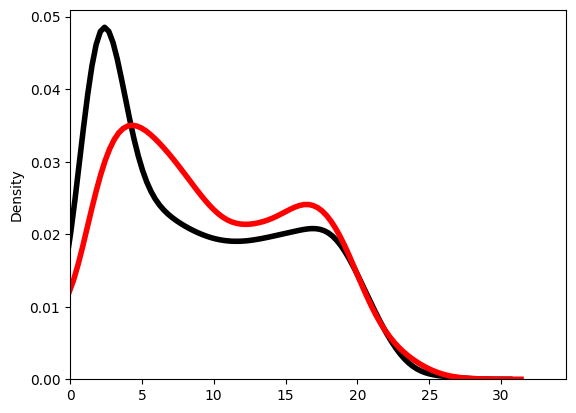

In [27]:
dark = dark_df.loc[(dark_df['condition']=='dark') ]
dark,_,_ = create_df_by_type(dark)
light = light_df.loc[(light_df['condition']=='light') ]
light,_,_  = create_df_by_type(light)

sns.distplot(np.concatenate(dark.distance_from_edge.to_numpy()), hist=False, kde=True, 
              color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(np.concatenate(light.distance_from_edge.to_numpy()), hist=False, kde=True, 
              color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim(left = 0)


In [9]:
df = pd.concat([light_df,dark_df])

In [14]:
df.condition

0       light
1       light
3       light
5       light
6       light
        ...  
2875     dark
2876     dark
2877     dark
2878     dark
2879     dark
Name: condition, Length: 6250, dtype: object

In [13]:
df

,level_0,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,...,mad_interp_ts_nose_y_cm,animal_mean_interp_ts_nose_y_cm,animal_median_interp_ts_nose_y_cm,animal_std_interp_ts_nose_y_cm,animal_mad_interp_ts_nose_y_cm,date_mean_interp_ts_nose_y_cm,date_median_interp_ts_nose_y_cm,date_std_interp_ts_nose_y_cm,date_mad_interp_ts_nose_y_cm,ts_inds
0,0,0,53211.744908,53213.829939,"[53211.752614, 53211.7691, 53211.785804, 53211...","[475, 476, 477, 478, 479, 480, 481, 482, 483, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[121.4166259765625, 120.82239532470703, 120.37...","[274.6488952636719, 274.42120361328125, 273.41...",...,"[1.7576560493963722, 1.7576560493963722, 1.709...","[17.400290889046374, 17.400290889046374, 17.40...","[16.899244761582352, 16.899244761582352, 16.89...","[1.7192512548645638, 1.7192512548645638, 1.719...","[1.7070071358889756, 1.7070071358889756, 1.707...","[17.400290889046374, 17.400290889046374, 17.40...","[16.899244761582352, 16.899244761582352, 16.89...","[1.7192512548645638, 1.7192512548645638, 1.719...","[1.7070071358889756, 1.7070071358889756, 1.707...","[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5..."
1,1,1,53213.829939,53216.173107,"[53213.836569, 53213.853516, 53213.870016, 532...","[[600, 601, 602, 603, 604, 605, 606, 607, 608,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[679.168701171875, 681.370361328125, 682.83502...","[258.8583679199219, 260.7340393066406, 262.258...",...,"[0.6788315125924651, 0.8914129044825501, 0.832...","[21.66175853150096, 21.489507205172657, 21.457...","[21.57729152543095, 21.37744986896854, 21.2831...","[0.5046473336100168, 0.635438877479974, 0.6997...","[0.48701961492851, 0.6040902809886042, 0.58265...","[21.66175853150096, 21.489507205172657, 21.457...","[21.57729152543095, 21.37744986896854, 21.2831...","[0.5046473336100168, 0.635438877479974, 0.6997...","[0.48701961492851, 0.6040902809886042, 0.58265...","[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6..."
3,3,3,53219.183936,53221.518886,"[53219.188428, 53219.205235, 53219.222745, 532...","[[921, 922, 923, 924, 925, 926, 927, 928, 929,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.5716552734375, 679.3147583007812, 680.650...","[257.8296813964844, 258.478515625, 259.3057861...",...,"[0.8939637494150166, 0.7580543498080363, 0.640...","[22.144587754587945, 21.877744625669322, 21.77...","[22.57487487906804, 22.70489673685067, 22.8371...","[0.8631016673461585, 1.4003668448465554, 1.978...","[0.3371091785364335, 0.3061693021389207, 0.641...","[22.144587754587945, 21.877744625669322, 21.77...","[22.57487487906804, 22.70489673685067, 22.8371...","[0.8631016673461585, 1.4003668448465554, 1.978...","[0.3371091785364335, 0.3061693021389207, 0.641...","[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6..."
5,5,6,53227.921459,53230.411929,"[53227.924672, 53227.942092, 53227.958092, 532...","[1445, 1446, 1447, 1448, 1449, 1450, 1451, 145...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[121.07388305664062, 121.237060546875, 121.234...","[275.1548767089844, 275.13238525390625, 275.01...",...,"[1.9358963306173624, 1.9358963306173624, 1.935...","[17.204440407833225, 17.204440407833225, 17.20...","[16.92482076716233, 16.92482076716233, 16.9248...","[0.9024440130630995, 0.9024440130630995, 0.902...","[0.6589802187923226, 0.6589802187923226, 0.658...","[17.204440407833225, 17.204440407833225, 17.20...","[16.92482076716233, 16.92482076716233, 16.9248...","[0.9024440130630995, 0.9024440130630995, 0.902...","[0.6589802187923226, 0.6589802187923226, 0.658...","[88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 9..."
6,6,7,53230.411929,53233.246566,"[53230.426547, 53230.44238, 53230.45911, 53230...","[[1595, 1596, 1597, 1598, 1599, 1600, 1601, 16...","[n

In [16]:
calculate_relative_distance_goal(df)

calculate_relative_distance(df)

angle_to_open_corner(df)

angle_to_target_port(df)

zero_out_angle(df)

zero_out_angle_target_port(df)

df_tortuosity(df)

lateral_error_open_corner(df)

find_consective_trials(df)

calculate_speed(df)


ValueError: NumPy boolean array indexing assignment cannot assign 86 input values to the 2 output values where the mask is true

(874, 50) (874, 50)
nan
(459, 50) (459, 50)
(415, 50) (415, 50)


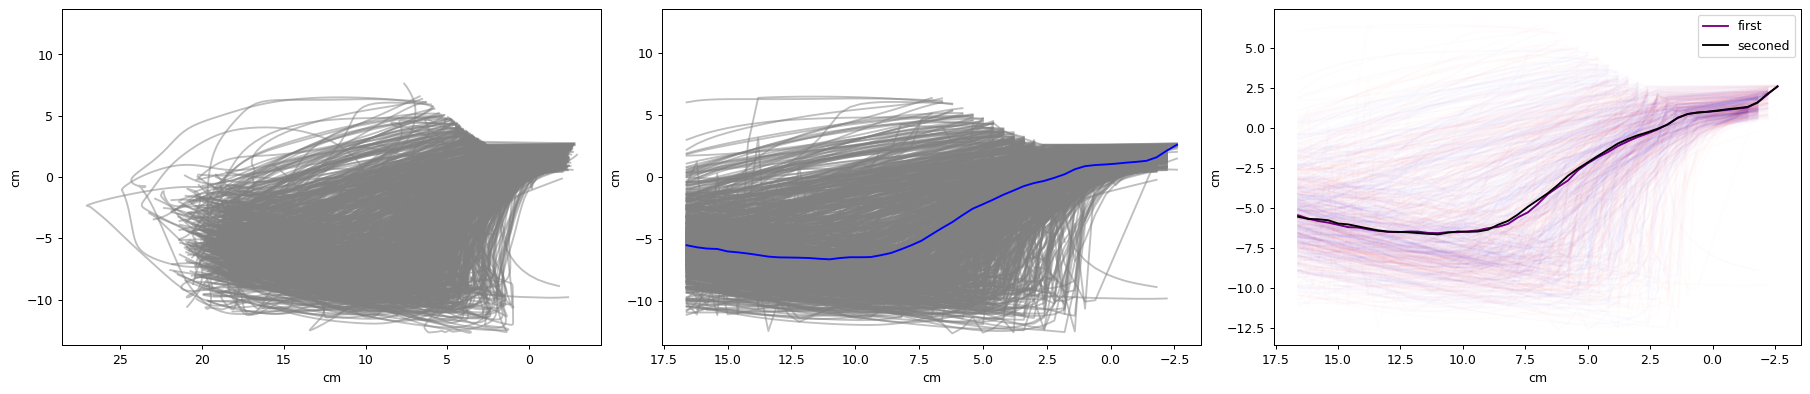

In [7]:
"""Distance from edge light"""
long_df = create_long_df(light_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>-3).max()
    ax1.plot(row['distance_from_edge'][:length],row['lateral_error'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
print(np.nanmedian(angle_array,axis = 0).max())
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()
symmetrize_y_axis(ax1)
symmetrize_y_axis(ax2)

(573, 50) (573, 50)
nan
(325, 50) (325, 50)
(248, 50) (248, 50)


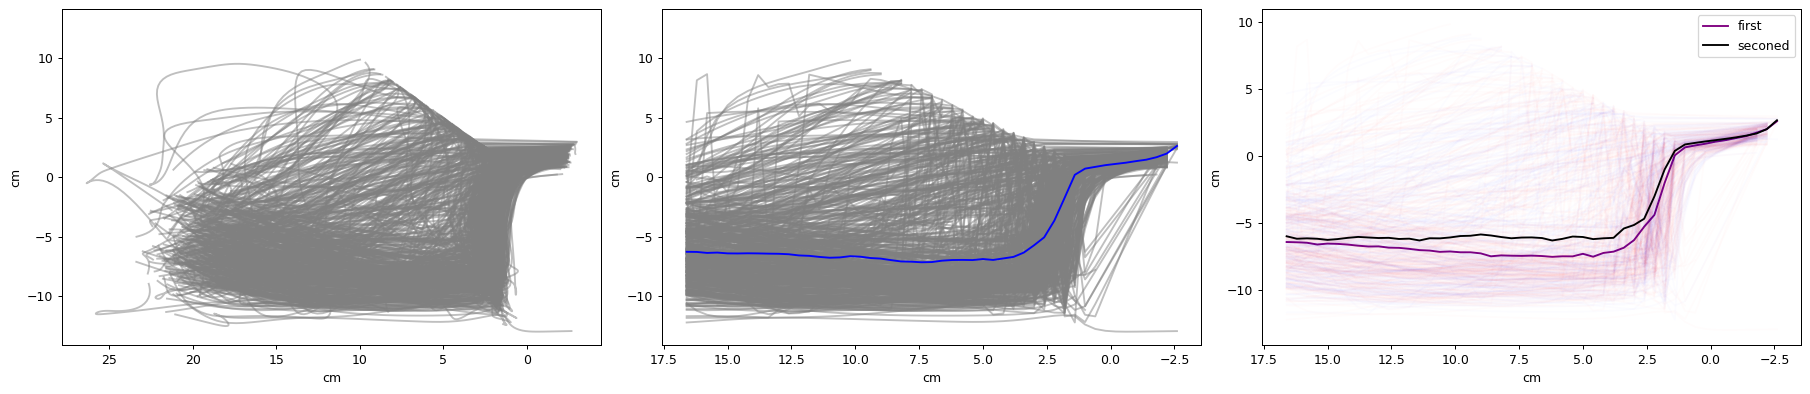

In [8]:
"""Distance from edge dark"""
long_df = create_long_df(dark_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>-3).max()
    ax1.plot(row['distance_from_edge'][:length],row['lateral_error'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
print(np.nanmedian(angle_array,axis = 0).max())
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()
symmetrize_y_axis(ax1)
symmetrize_y_axis(ax2)

In [ ]:
long_df = create_long_df(bb_df)

fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('deg')
ax1.set_xlabel('cm')
ax2.set_ylabel('deg')
ax2.set_xlabel('cm')
ax3.set_ylabel('deg')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>1).max()
    ax1.plot(row['distance_from_edge'][:length],row['zero_out_angle_to_corner'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()